# Homework # 3 - K-Nearest Neighbor
Data file: social_network_ads.csv

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
# Read CSV into dataframe
df = pd.read_csv("Data/social_network_ads.csv")

In [3]:
# Display first few rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Drop unnecessary columns 'User ID' and 'Gender'

In [4]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)

### Explore data

#### Display a histogram with bins showing the distribution of the variable: Age

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

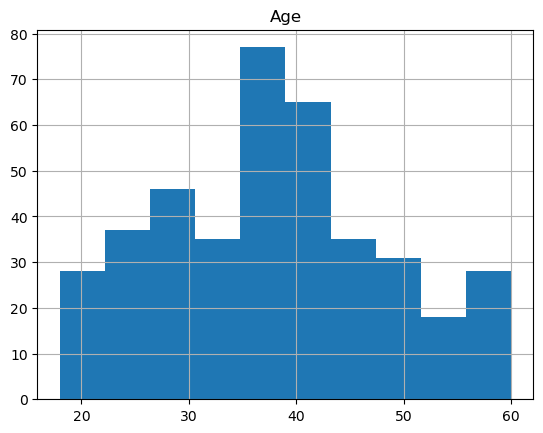

In [5]:
df.hist("Age", bins = 10)

#### Display a histogram with bins showing the distribution of the variable: EstimatedSalary

array([[<AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

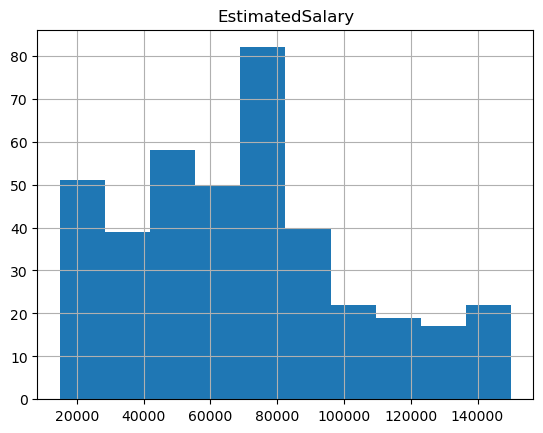

In [6]:
df.hist("EstimatedSalary")

#### Display min and max for variable: Age

In [7]:
df["Age"].agg(['min','max'])

min    18
max    60
Name: Age, dtype: int64

#### Display min and max for variable: EstimatedSalary

In [8]:
df["EstimatedSalary"].agg(['min','max'])

min     15000
max    150000
Name: EstimatedSalary, dtype: int64

#### Note that the scale for variable EstimatedSalary is much higher than for variable Age

### Separate independent and dependent variables
* Independent variables: All except Purchased
* Dependent variable: Purchased

In [9]:
X = df.drop("Purchased", axis = 1)
y = df["Purchased"]

In [10]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


### Scale (standardize) variables: Age and EstimatedSalary

In [11]:
# Use StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X["Age"]=pd.Series(X_scaled[:,0])
X["EstimatedSalary"]=pd.DataFrame(X_scaled[:,1])

#### Display min and max for scaled variable: Age

In [12]:
X["Age"].agg(['min','max'])

min   -1.877311
max    2.134241
Name: Age, dtype: float64

#### Display min and max for scaled variable: EstimatedSalary

In [13]:
X["EstimatedSalary"].agg(['min','max'])

min   -1.607506
max    2.356750
Name: EstimatedSalary, dtype: float64

### Split data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Train KNeighborsClassifier (with default hyperparameters)

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluate model performance

In [16]:
# Predict using the test set
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 93.33%


In [17]:
# Print model accuracy score on test set
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 93.33%


In [18]:
# Generate classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



### Train KNeighborsClassifier (change n_neighbors hyperparameter and at least one other hyperparameter)

In [19]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric="cosine")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=7, weights='distance')

### Evaluate model performance

In [20]:
# Predict using the test set
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 82.5%


In [21]:
# Print model accuracy score on test set
y_pred=knn.predict(X_test)
print(f"Accuracy = {round((accuracy_score(y_test, y_pred) * 100), 2)}%")

Accuracy = 82.5%


In [22]:
# Generate classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        73
           1       0.81      0.72      0.76        47

    accuracy                           0.82       120
   macro avg       0.82      0.81      0.81       120
weighted avg       0.82      0.82      0.82       120

